### ***Page View Time Series Visualizer***


For this project you will visualize time series data using a line chart, bar chart, and box plots to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help to understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


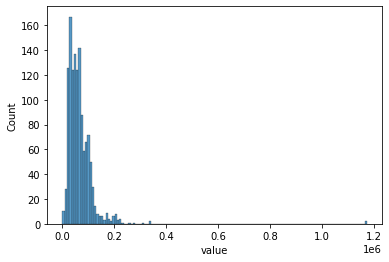

In [4]:
sb.histplot(x='value',data=df)

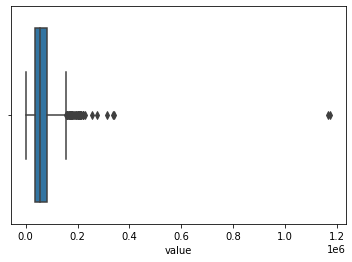

In [5]:
sb.boxplot(x='value',data=df)

#### **Question 1**

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [6]:
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### **Question 2**

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [8]:
df.shape

(1304, 1)

Top 2.5% of the data and bottom 2.5% of the normalized data is = mean +- 2(std) for normal distribution data. since our data is right skewed, we remove these outliers as seen in box plot by given method.

In [9]:
df.shape

(1304, 1)

In [10]:
m = df['value'].mean()
s = df['value'].std()
upper = m + (2*s)
lower = m - (2*s)

In [11]:
df = df.loc[df['value']<=upper]
df = df.loc[df['value']>=lower]

In [12]:
df.shape

(1274, 1)

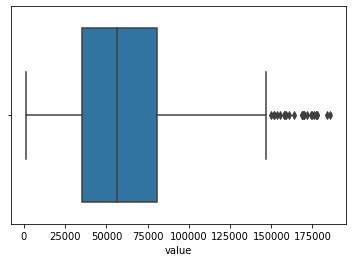

In [13]:
sb.boxplot(x='value',data=df)

#### **Question 3**

Draw a line chart whose title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

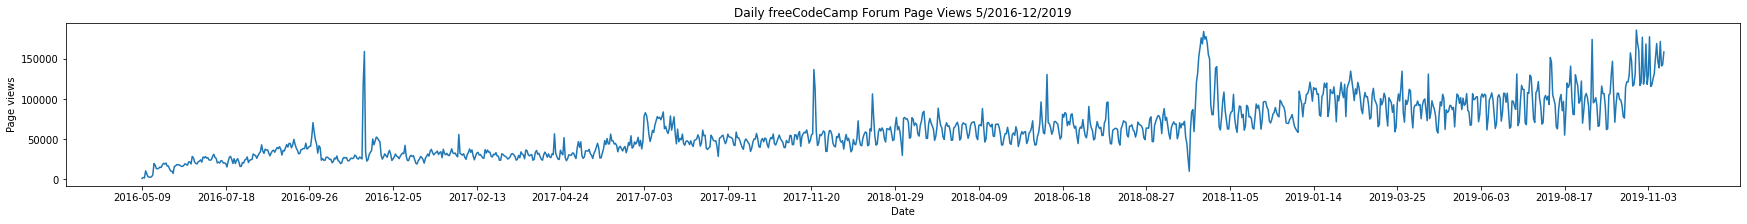

In [14]:
fig, ax = plt.subplots(figsize=(30,3))
sb.lineplot(x='date',y='value',data=df)
plt.xticks(np.arange(0, df['value'].count(), 70)) # to arrange the ticklabels frequency accordingly to reduce  
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019") 
plt.show()

#### **Question 4**

Draw a bar chart that shows average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [15]:
df.reset_index(inplace=True)

In [16]:
df['date'] = df['date'].astype('datetime64[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1274 non-null   datetime64[ns]
 1   value   1274 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.0 KB


In [18]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [19]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [20]:
df.head()

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May


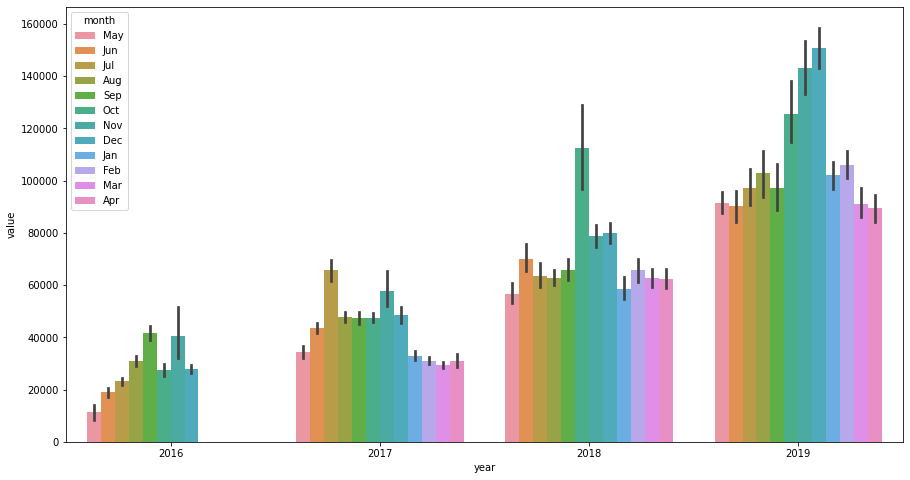

In [21]:
plt.figure(figsize=(15,8))
sb.barplot(x='year',y='value',hue='month',data=df)

#### **Question 5**

Draw two adjacent box plots to show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 

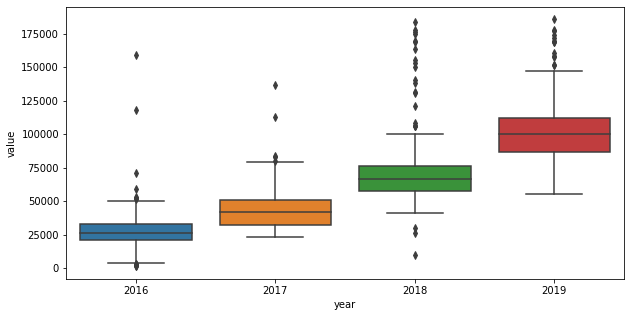

In [22]:
plt.figure(figsize=(10,5))
sb.boxplot(x='year',y='value',data=df)

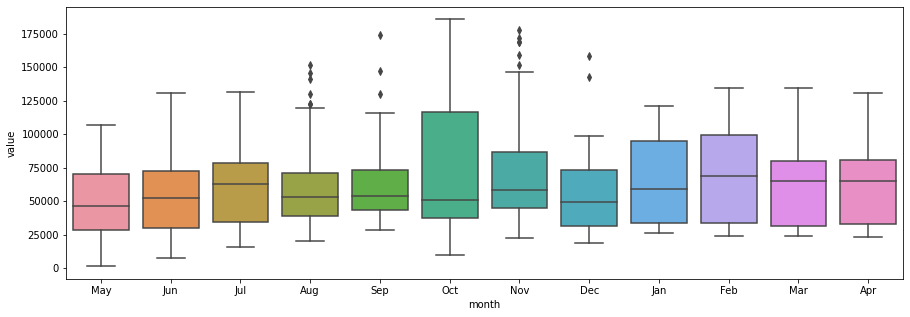

In [23]:
plt.figure(figsize=(15,5))
sb.boxplot(x='month',y='value',data=df)